In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [30]:
df = pd.read_csv('Опросник для исследования.csv')
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '-']
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '?']
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '1 курс']
df.drop(list(df.filter(regex = 'Отзыв')), axis = 1, inplace = True)
df.drop(list(df.filter(regex = 'Количество баллов')), axis = 1, inplace = True)
df = df.drop(['Отметка времени', 'Отметьте из списка эти ветви власти ', 'Сколько длится президентский срок? (напишите только цифру)', 'Из каких палат состоит Парламент? (выберите несколько)', 'Действующий премьер-министр РК', 'Экономическая система РК', 'Является ли РК светским государством?', 'Сколько сроков подряд можно избираться президентом? (напишите только цифру)', 'Выберите государственные символы', 'Может ли Президент быть досрочно освобожден от должности решением Парламента?', 'Как называется процедура отстранения президента от должности?', 'Знаете ли вы имя акима вашего населенного пункта?'], axis = 1)
df.drop(['Сколько существует ветвей власти? (напишите только цифру)'], axis = 1, inplace = True)
df.shape

(69, 26)

In [32]:
df = df.rename({'Всего баллов': 'score', 'Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)': 'gpa'}, axis=1)
df = df.rename({'Пол': 'male', 'Возраст': 'age', 'Где вы проживали на момент учебы в школе?': 'city', 'Язык обучения в вашем классе': 'lang', 'Частная или государственная школа': 'private', 'Формат школы': 'type', 'Знание английского на момент обучения в школе': 'english'}, axis=1)
df = df.rename({'Ваша успеваемость в школе': 'gpa_school', 'Посещали репетиторов во время школы?': 'tutors', 'Посещали спортивные секции во время школы?': 'sport', 'Занимались творчеством (рисование/рукоделие/театр)?': 'art', 'Имелся ли в школе интернет?': 'internet', 'Есть ли высшее образование у ваших родителей (хотя бы у одного)?': 'edu_parents', 'Средняя зп в месяц ваших родителей (суммарно) во время вашего обучения в школе': 'wage', 'Смотрите/читаете новости': 'news', 'Основной источник новостей': 'news_source', 'Проявляли политическую активность (были наблюдателями на выборах например)': 'activism', 'Участник молодежных организаций (МИСК, молодежное крыло полит партии и другое)': 'organization', 'Сталкивались с несправедливостью': 'injustice', 'Интересуетесь политикой': 'interest'}, axis=1)
df = df.rename({'Интересуются ли родители политикой': 'interest_parents', 'Ходят ли ваши родители на выборы?': 'vote_parents', 'Насколько устраивает жизнь в КЗ': 'satisfaction', 'Имелись ли в вашем населенном пункте культурные объекты (библиотеки/музеи/американские уголки/мастерские/театры)?': 'city_culture'}, axis=1)
df.columns
df = df.replace({'type':{'Обычная школа': 'ordinary', 'НИШ/КТЛ/РФМШ': 'NIS/BIL/RPhMS', 'Гимназия/лицей': 'Gymnasium/lyceum', 'Haileybury/Miras/Galaxy/другая частная школа': 'Private school'}})
df = df.replace({'gpa_school':{'Отличник': 'Excellent', 'Ударник': 'Good', 'Троечник': 'Satisfactory'}})


In [33]:
le = LabelEncoder()
y = le.fit_transform(df['lang'])
y
#rus = 1
df['lang'] = y

In [34]:
y = le.fit_transform(df['private'])
y
#private = 1
df['private'] = y

In [35]:
y = le.fit_transform(df['male'])
y
#male = 1
df['male'] = y

In [36]:
y = le.fit_transform(df['city'])
y
#city = 0
df['city'] = y
df = df.rename({'city': 'village'}, axis = 1)

In [37]:
df = df.replace('Да', 1)
df = df.replace('Нет', 0)

In [38]:
df.loc[df['gpa'] == '1,67']
df = df.replace('1,67', '1.67')
df.loc[df['gpa'] == '1,67']
df.loc[df['gpa'] == '2,8']
df = df.replace('2,8', '2.8')
df.loc[df['gpa'] == '2,8']
df.loc[df['gpa'] == '2,76']
df = df.replace('2,76', '2.76')
df.loc[df['gpa'] == '2,76']
df = df.astype({"gpa": float})


In [40]:
X = df.copy()
X = X.replace('50 000 - 100 000', '75000')
X = X.replace('100 000 - 200 000', '150000')
X = X.replace('200 000 - 300 000', '250000')
X = X.replace('300 000 - 400 000', '350000')
X = X.replace('400 000 - 500 000', '450000')
X = X.replace('500 000 и больше', '600000')
X = X.astype({"wage": int})
print(X.shape)
X = X.drop(['score', 'gpa', 'news', 'news_source', 'activism',
       'organization', 'injustice', 'interest', 'interest_parents',
       'vote_parents', 'satisfaction', 'city_culture'], axis=1)
X = pd.get_dummies(data=X)
#X = X.rename({'news_source_Блоггеры': 'news_source_bloggers', 'news_source_Новостные порталы в интернете': 'news_source_news_portals', 'news_source_Паблики в соц сетях': 'news_source_social_meadia', 'news_source_Телевизор': 'news_source_TV'}, axis=1)
#X = X.rename({'satisfaction_Да, устраивает': 'satisfaction_Yes,satisfied', 'satisfaction_Затрудняюсь ответить': 'satisfaction_Cannot answer', 'satisfaction_Нет, не устраивает': 'satisfaction_No,not satisfied', 'satisfaction_Скорее не устраивает': 'satisfaction_Rather not satisfied', 'satisfaction_Скорее устраивает': 'satisfaction_Rather satisfied'}, axis=1)

#X = X.drop(['news_source_Новостные порталы в интернете','news_source_Блоггеры', 'satisfaction_Скорее устраивает', 'satisfaction_Затрудняюсь ответить', 'satisfaction_Скорее не устраивает', 'satisfaction_Нет, не устраивает', 'news_source_Телевизор'], axis=1)

y = df['gpa']

X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

(69, 26)
                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.099
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.381
Time:                        17:16:35   Log-Likelihood:                -56.267
No. Observations:                  69   AIC:                             154.5
Df Residuals:                      48   BIC:                             201.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const            

In [44]:

#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)

#regr = linear_model.LinearRegression()

#regr.fit(x_train, y_train)

#regr.score(x_test, y_test)
#why regression is so changable

In [45]:
X.columns

Index(['const', 'male', 'age', 'village', 'lang', 'private', 'tutors', 'sport',
       'art', 'internet', 'edu_parents', 'wage', 'type_Gymnasium/lyceum',
       'type_NIS/BIL/RPhMS', 'type_Private school', 'type_ordinary',
       'english_A0-A1', 'english_A2', 'english_B1', 'english_B2',
       'english_C1-C2', 'gpa_school_Excellent', 'gpa_school_Good',
       'gpa_school_Satisfactory'],
      dtype='object')

LASSO best alpha:  1000.0


<AxesSubplot:xlabel='lasso_coeff', ylabel='features'>

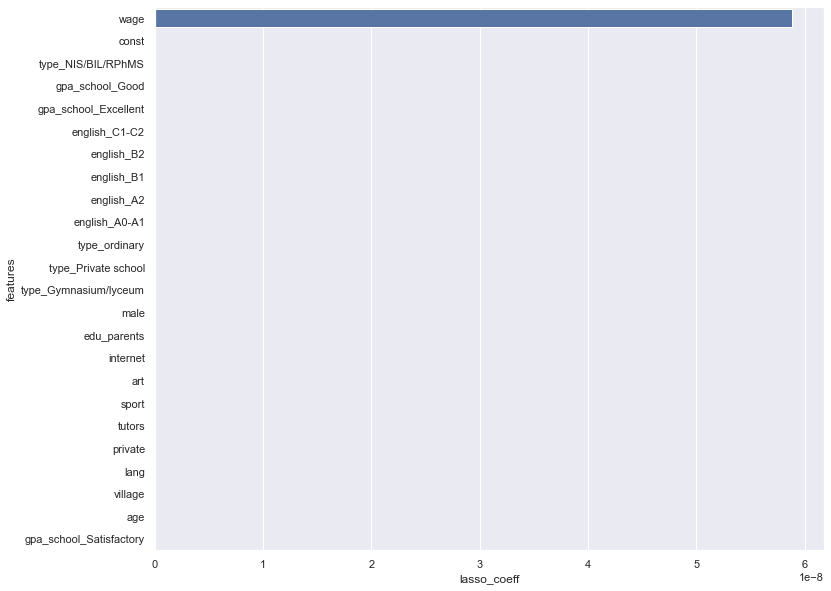

In [47]:
from sklearn.linear_model import LassoCV

#LassoCV to find the optimal alpha value for L1 regularization
alphavec = 10**np.linspace(-3,3,200) 
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X, y)

print("LASSO best alpha: ", lasso_model.alpha_ )# display all coefficients in the model with optimal alpha

feature_coefs = list(zip(X.columns, lasso_model.coef_))

feature_coefs = pd.DataFrame(feature_coefs, columns = ["features", "lasso_coeff"])
feature_coefs["lasso_coeff"] = np.abs(feature_coefs["lasso_coeff"]) 
feature_coefs.sort_values(by = "lasso_coeff", ascending=False, inplace=True)

sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(y = feature_coefs.features, x = feature_coefs.lasso_coeff, color='b')

In [48]:
features_significant = feature_coefs.features[feature_coefs.lasso_coeff >= 0.015]
features_significant
#by p-values: activism, injustice, interest, новостные порталы, паблики, да устраивает, затрудняюсь, скорее не устраивает, устраивает

Series([], Name: features, dtype: object)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.sort_values(by='Coefficient', ascending=False)


,Coefficient
english_C1-C2,4.445533e-01
private,3.759671e-01
gpa_school_Excellent,2.452204e-01
village,2.294968e-01
sport,2.264249e-01
english_B2,1.783442e-01
edu_parents,1.175398e-01
lang,3.320049e-02
type_Gymnasium/lyceum,2.044307e-02
type_Private school,0.000000e+00


(69, 26)
gpa                        1.000000
gpa_school_Excellent       0.289497
english_C1-C2              0.200991
tutors                     0.101124
english_A2                 0.078511
english_B2                 0.063493
type_Private school        0.050088
sport                      0.048814
type_Gymnasium/lyceum      0.045345
edu_parents                0.015328
village                    0.012915
type_ordinary              0.002382
english_B1                -0.021995
lang                      -0.022968
wage                      -0.023771
private                   -0.049217
age                       -0.066041
type_NIS/BIL/RPhMS        -0.068411
internet                  -0.084145
art                       -0.155846
male                      -0.169619
gpa_school_Satisfactory   -0.182062
gpa_school_Good           -0.214502
english_A0-A1             -0.271849
Name: gpa, dtype: float64


<AxesSubplot:>

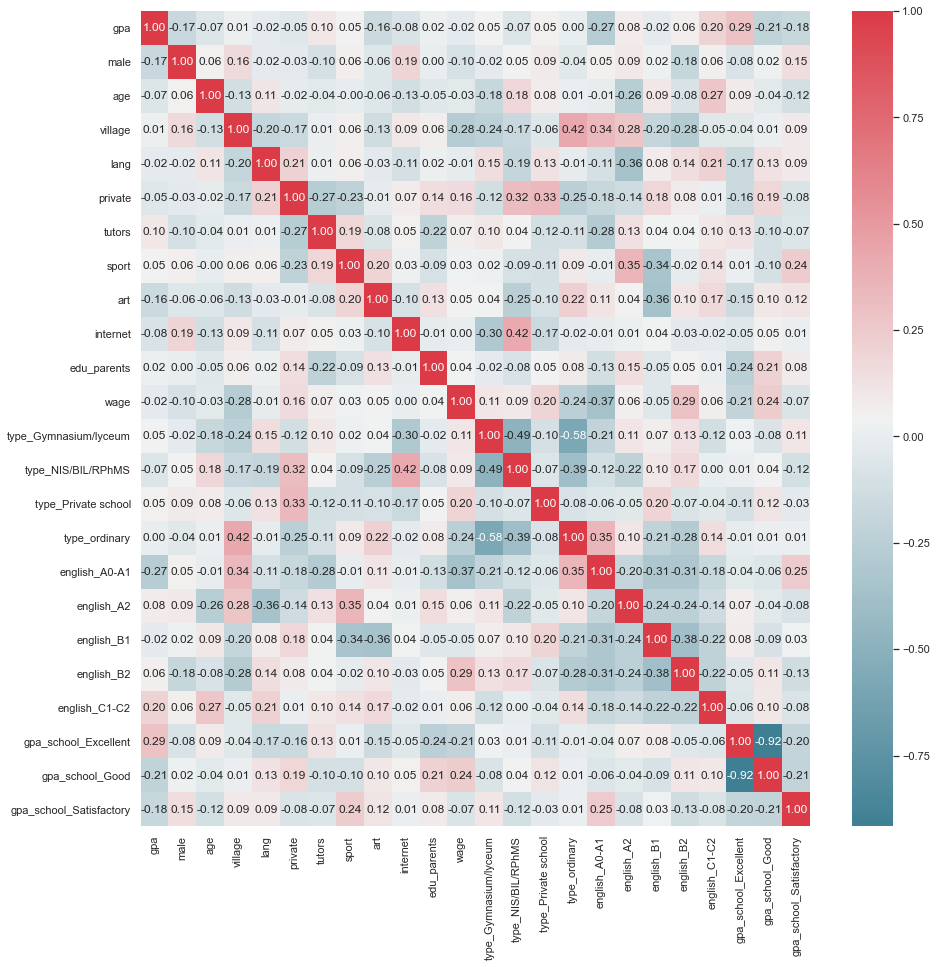

In [51]:
X = df.copy()
X = X.replace('50 000 - 100 000', '75000')
X = X.replace('100 000 - 200 000', '150000')
X = X.replace('200 000 - 300 000', '250000')
X = X.replace('300 000 - 400 000', '350000')
X = X.replace('400 000 - 500 000', '450000')
X = X.replace('500 000 и больше', '600000')
X = X.astype({"wage": int})

X = X.drop(['score', 'news', 'news_source', 'activism',
       'organization', 'injustice', 'interest', 'interest_parents',
       'vote_parents', 'satisfaction', 'city_culture'], axis=1)
X = pd.get_dummies(data=X)
#X = df.copy()
#print(X.shape)
#X = X.drop(['lang', 'private', 'type', 'english', 'gpa_school', 'gpa', 'tutors', 'sport', 'art', 'internet'], axis=1)
#X = X.drop(['news_source', 'satisfaction'], axis=1)
#X = pd.get_dummies(data=X)
corm = X.corr()
print(corm['gpa'].sort_values(ascending=False))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(corm, cmap=colormap, annot = True, fmt='.2f')

In [53]:
plt.rcParams["figure.figsize"] = (7,3)
X.columns

Index(['gpa', 'male', 'age', 'village', 'lang', 'private', 'type', 'english',
       'gpa_school', 'tutors', 'sport', 'art', 'internet', 'edu_parents',
       'wage'],
      dtype='object')

KZ    37
RU    32
Name: lang, dtype: int64
KZ    0.536232
RU    0.463768
Name: lang, dtype: float64


<AxesSubplot:>

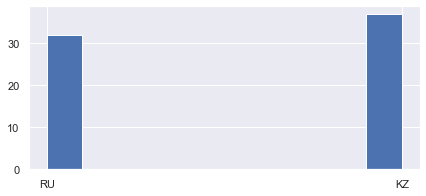

In [58]:
X = df.copy()
X = X.drop(['score', 'news', 'news_source', 'activism',
       'organization', 'injustice', 'interest', 'interest_parents',
       'vote_parents', 'satisfaction', 'city_culture'], axis=1)
X = X.replace({'lang': {1: 'RU', 0: 'KZ'}})
print(X['lang'].value_counts())
print(X['lang'].value_counts(normalize=True))
X['lang'].hist()

state      61
private     8
Name: private, dtype: int64
state      0.884058
private    0.115942
Name: private, dtype: float64


<AxesSubplot:>

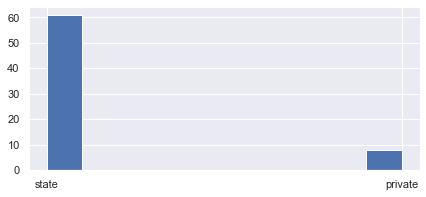

In [60]:
X = X.replace({'private': {1: 'private', 0: 'state'}})
print(X['private'].value_counts())
print(X['private'].value_counts(normalize=True))
X['private'].hist()

M    46
F    23
Name: male, dtype: int64
M    0.666667
F    0.333333
Name: male, dtype: float64


<AxesSubplot:>

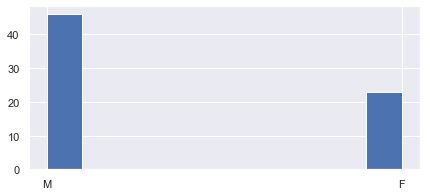

In [59]:
X = X.replace({'male': {1: 'M', 0: 'F'}})
print(X['male'].value_counts())
print(X['male'].value_counts(normalize=True))
X['male'].hist()
#male - 1, fem - 0

19    22
20    18
18    16
21    10
17     2
22     1
Name: age, dtype: int64
19    0.318841
20    0.260870
18    0.231884
21    0.144928
17    0.028986
22    0.014493
Name: age, dtype: float64


<AxesSubplot:>

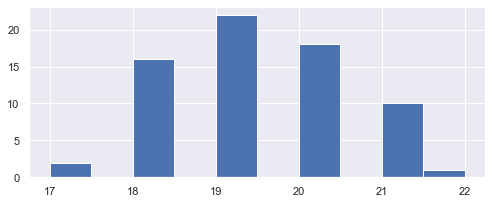

In [489]:
print(X['age'].value_counts())
print(X['age'].value_counts(normalize=True))

X['age'].hist()

city       57
village    12
Name: village, dtype: int64
city       0.826087
village    0.173913
Name: village, dtype: float64


<AxesSubplot:>

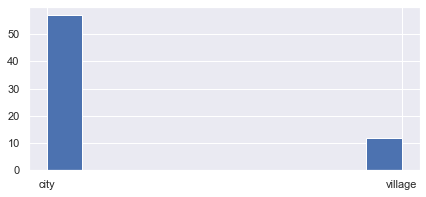

In [61]:
X = X.replace({'village': {1: 'village', 0: 'city'}})
print(X['village'].value_counts())
print(X['village'].value_counts(normalize=True))
X['village'].hist()
#village - 1, city - 0

yes    60
no      9
Name: edu_parents, dtype: int64
yes    0.869565
no     0.130435
Name: edu_parents, dtype: float64


<AxesSubplot:>

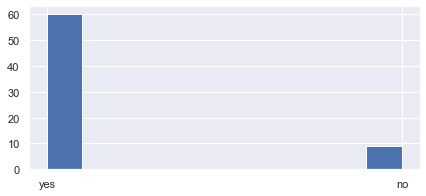

In [62]:
X = X.replace({'edu_parents': {1: 'yes', 0: 'no'}})
print(X['edu_parents'].value_counts())
print(X['edu_parents'].value_counts(normalize=True))
X['edu_parents'].hist()
#have hgher ed - 1, no higher ed - 0

200 000 - 300 000    19
400 000 - 500 000    13
500 000 and more     12
100 000 - 200 000    11
300 000 - 400 000    10
50 000 - 100 000      4
Name: wage, dtype: int64
200 000 - 300 000    0.275362
400 000 - 500 000    0.188406
500 000 and more     0.173913
100 000 - 200 000    0.159420
300 000 - 400 000    0.144928
50 000 - 100 000     0.057971
Name: wage, dtype: float64


<AxesSubplot:>

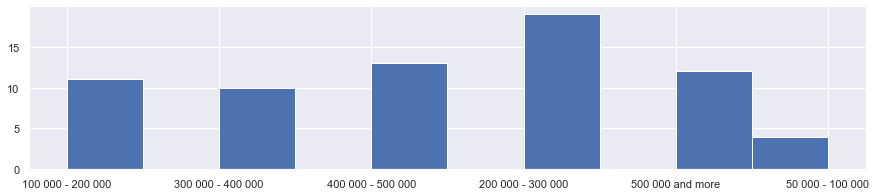

In [63]:
X = X.replace({'wage': {'500 000 и больше': '500 000 and more'}})
plt.rcParams["figure.figsize"] = (15,3)
print(X['wage'].value_counts())
print(X['wage'].value_counts(normalize=True))
X['wage'].hist()

Gymnasium/lyceum    29
ordinary            22
NIS/BIL/RPhMS       17
Private school       1
Name: type, dtype: int64
Gymnasium/lyceum    0.420290
ordinary            0.318841
NIS/BIL/RPhMS       0.246377
Private school      0.014493
Name: type, dtype: float64


<AxesSubplot:>

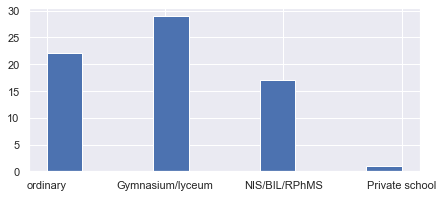

In [64]:
plt.rcParams["figure.figsize"] = (7,3)
print(X['type'].value_counts())
print(X['type'].value_counts(normalize=True))
X['type'].hist()

no     35
yes    34
Name: tutors, dtype: int64
no     0.507246
yes    0.492754
Name: tutors, dtype: float64


<AxesSubplot:>

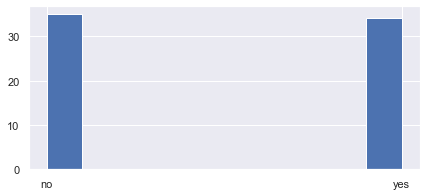

In [66]:
X = X.replace({'tutors': {1: 'yes', 0:'no'}})
print(X['tutors'].value_counts())
print(X['tutors'].value_counts(normalize=True))
X['tutors'].hist()

no     39
yes    30
Name: sport, dtype: int64
no     0.565217
yes    0.434783
Name: sport, dtype: float64


<AxesSubplot:>

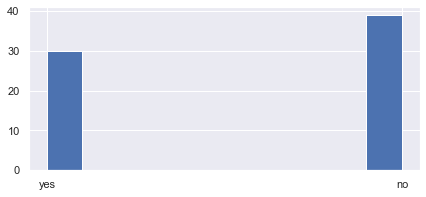

In [67]:
X = X.replace({'sport': {1: 'yes', 0:'no'}})
print(X['sport'].value_counts())
print(X['sport'].value_counts(normalize=True))
X['sport'].hist()

no     42
yes    27
Name: art, dtype: int64
no     0.608696
yes    0.391304
Name: art, dtype: float64


<AxesSubplot:>

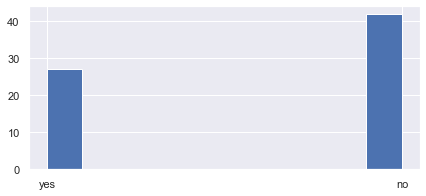

In [68]:
X = X.replace({'art': {1: 'yes', 0:'no'}})
print(X['art'].value_counts())
print(X['art'].value_counts(normalize=True))
X['art'].hist()

yes    45
no     24
Name: internet, dtype: int64
yes    0.652174
no     0.347826
Name: internet, dtype: float64


<AxesSubplot:>

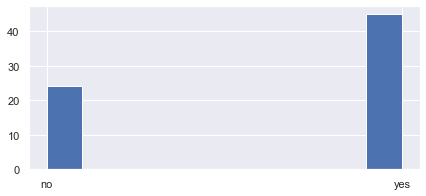

In [69]:
X = X.replace({'internet': {1: 'yes', 0:'no'}})
print(X['internet'].value_counts())
print(X['internet'].value_counts(normalize=True))
X['internet'].hist()

Good            34
Excellent       32
Satisfactory     3
Name: gpa_school, dtype: int64
Good            0.492754
Excellent       0.463768
Satisfactory    0.043478
Name: gpa_school, dtype: float64


<AxesSubplot:>

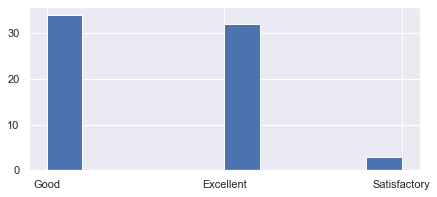

In [70]:
print(X['gpa_school'].value_counts())
print(X['gpa_school'].value_counts(normalize=True))
X['gpa_school'].hist()

B1       19
B2       19
A0-A1    14
A2        9
C1-C2     8
Name: english, dtype: int64
B1       0.275362
B2       0.275362
A0-A1    0.202899
A2       0.130435
C1-C2    0.115942
Name: english, dtype: float64


<AxesSubplot:>

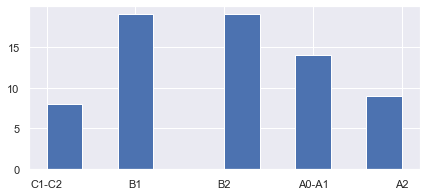

In [72]:
print(X['english'].value_counts())
print(X['english'].value_counts(normalize=True))
X['english'].hist()

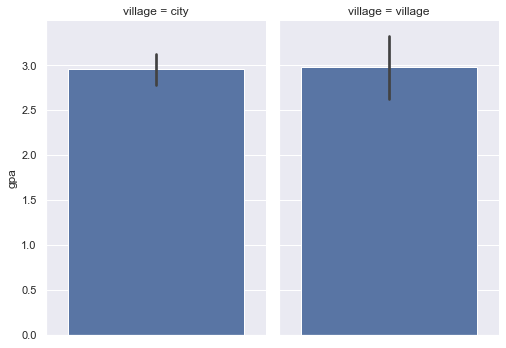

In [73]:
sns.catplot(y="gpa",col = 'village',data=X, kind="bar", height=5, aspect=.7)

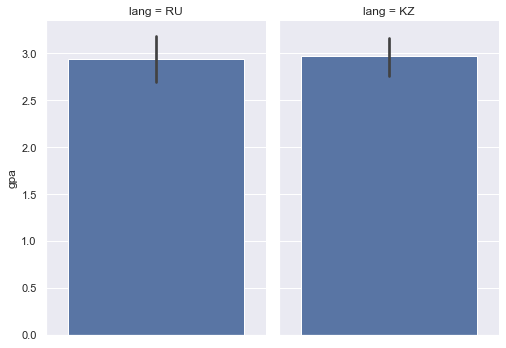

In [74]:
sns.catplot(y="gpa",col = 'lang',data=X, kind="bar", height=5, aspect=.7)

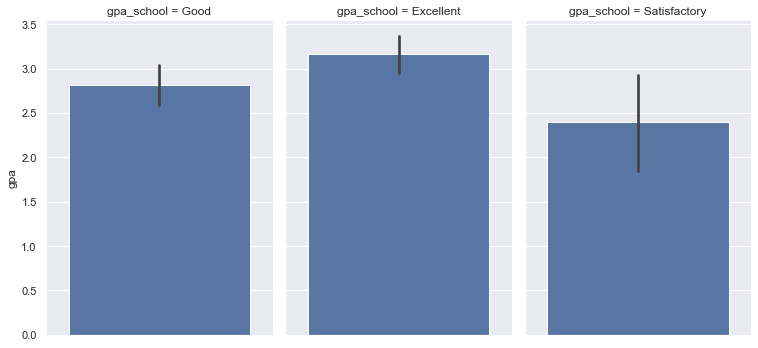

In [75]:
sns.catplot(y="gpa",col = 'gpa_school',data=X, kind="bar", height=5, aspect=.7)

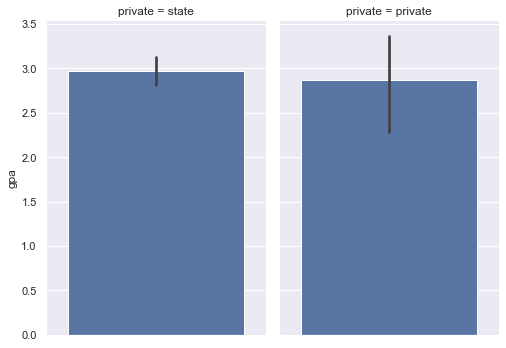

In [76]:
sns.catplot(y="gpa",col = 'private',data=X, kind="bar", height=5, aspect=.7)

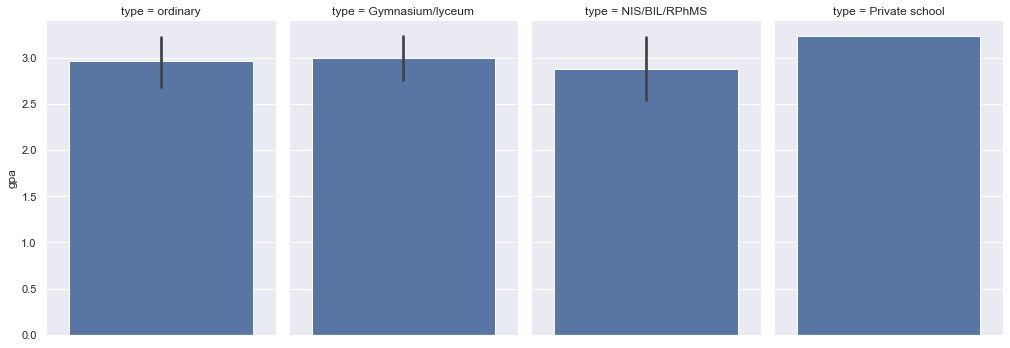

In [78]:
sns.catplot(y="gpa",col = 'type',data=X, kind="bar", height=5, aspect=.7)

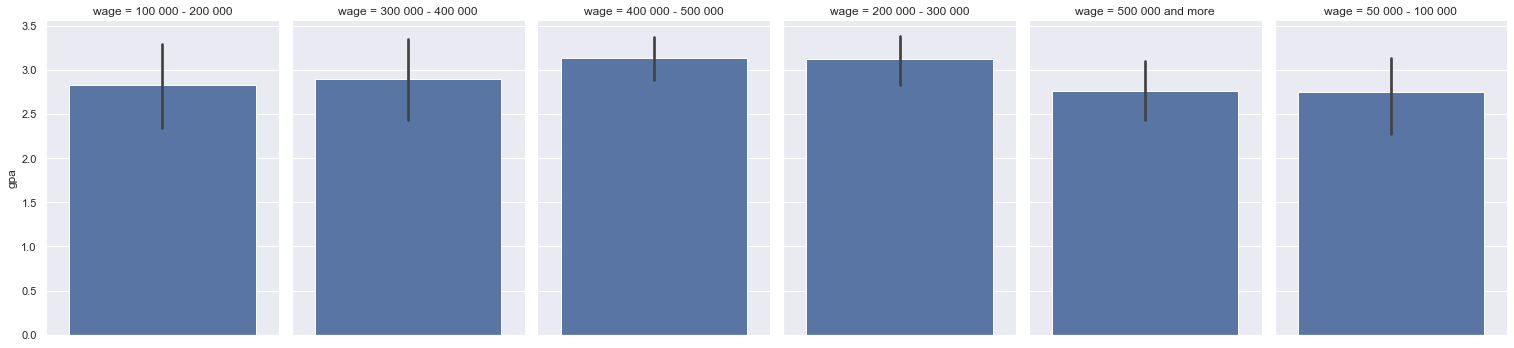

In [77]:
sns.catplot(y="gpa",col = 'wage',data=X, kind="bar", height=5, aspect=.7)

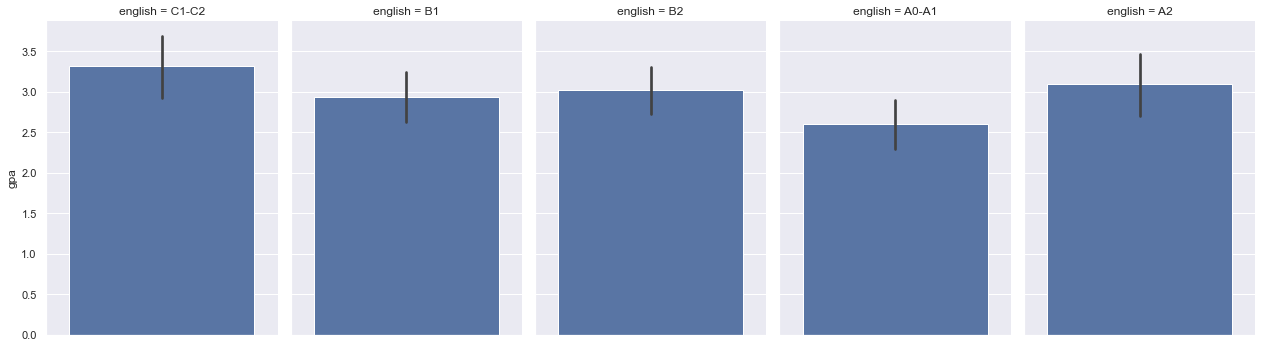

In [79]:
sns.catplot(y="gpa",col = 'english',data=X, kind="bar", height=5, aspect=.7)

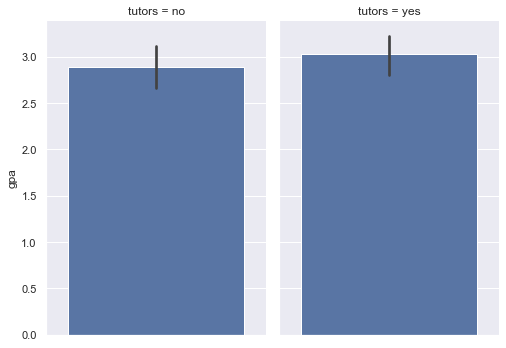

In [80]:
sns.catplot(y="gpa",col = 'tutors',data=X, kind="bar", height=5, aspect=.7)

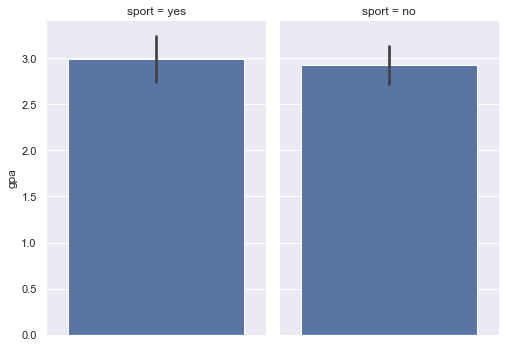

In [81]:
sns.catplot(y="gpa",col = 'sport',data=X, kind="bar", height=5, aspect=.7)

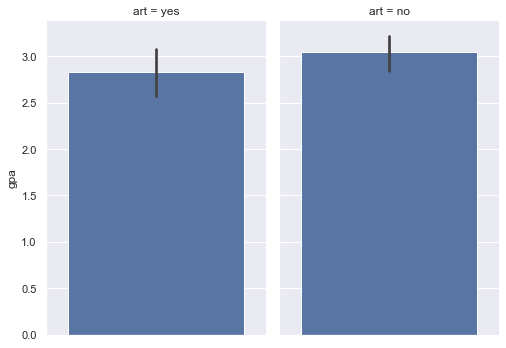

In [82]:
sns.catplot(y="gpa",col = 'art',data=X, kind="bar", height=5, aspect=.7)

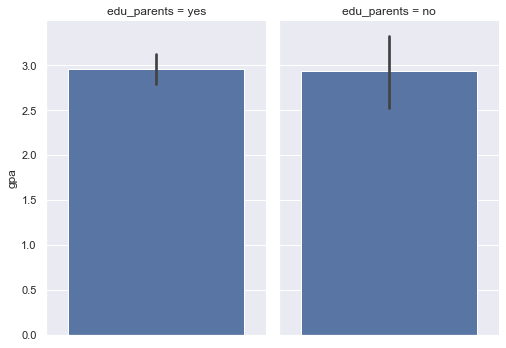

In [83]:
sns.catplot(y="gpa",col = 'edu_parents',data=X, kind="bar", height=5, aspect=.7)

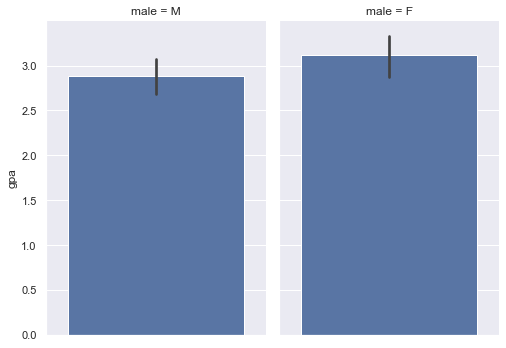

In [87]:
sns.catplot(y="gpa",col = 'male',data=X, kind="bar", height=5, aspect=.7)

In [88]:
X.columns

Index(['gpa', 'male', 'age', 'village', 'lang', 'private', 'type', 'english',
       'gpa_school', 'tutors', 'sport', 'art', 'internet', 'edu_parents',
       'wage'],
      dtype='object')